<a href="https://colab.research.google.com/github/lydiateinfalt/DATS6501-Capstone-Fall2022/blob/main/GOST_Urban_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 10.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 12.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 27.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 24.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 24.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 51.3 MB/s 
     |████████████████████████████████| 19.3 MB 513 kB/s 
     |██

In [3]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import geopandas as gpd

In [5]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/GOST_Urban/data/visualization/urban_extents.geojson")

In [7]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
import geojson

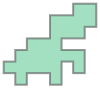

In [18]:
data['geometry'][2]

In [24]:
data.head()

,ID,Pop,geometry
0,1030,8729.343750,"POLYGON ((69.44875 28.43292, 69.49042 28.43292..."
1,1031,131013.601562,"POLYGON ((69.53208 28.48292, 69.54042 28.48292..."
2,1032,9792.393555,"POLYGON ((68.64875 28.41625, 68.66542 28.41625..."
3,1033,14905.970703,"POLYGON ((69.35708 28.39125, 69.38208 28.39125..."
4,1035,16471.582031,"POLYGON ((69.41542 28.34958, 69.42375 28.34958..."


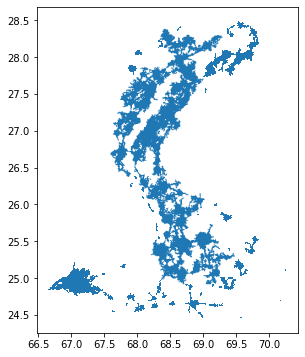

In [25]:
import matplotlib.pyplot as plt

data.plot(figsize=(6, 6))
plt.show()

In [26]:
df = data.to_crs(epsg=4326)
print(df.crs)
df.head()

epsg:4326


,ID,Pop,geometry
0,1030,8729.343750,"POLYGON ((69.44875 28.43292, 69.49042 28.43292..."
1,1031,131013.601562,"POLYGON ((69.53208 28.48292, 69.54042 28.48292..."
2,1032,9792.393555,"POLYGON ((68.64875 28.41625, 68.66542 28.41625..."
3,1033,14905.970703,"POLYGON ((69.35708 28.39125, 69.38208 28.39125..."
4,1035,16471.582031,"POLYGON ((69.41542 28.34958, 69.42375 28.34958..."


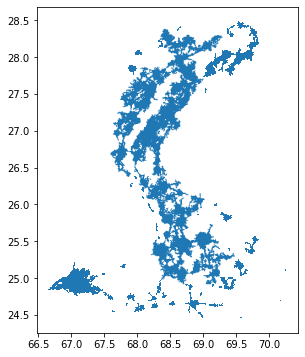

In [27]:
df.plot(figsize=(6, 6))
plt.show()

In [28]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
import folium

map = folium.Map(location=[24, 71], tiles='CartoDB positron')
map

In [51]:
for _, r in df.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['ID']).add_to(geo_j)
    geo_j.add_to(map)
map

In [43]:
hd_urban = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/GOST_Urban/data/visualization/hd_urban_extents.geojson")

print(hd_urban.crs)
hd_urban.head()
hd_urban = hd_urban.to_crs(epsg=4326)

epsg:4326


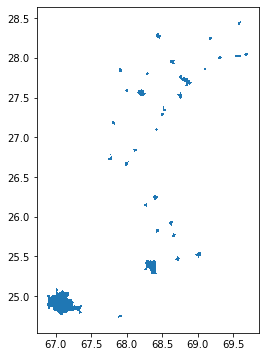

In [44]:
hd_urban.plot(figsize=(6, 6))
plt.show()

In [45]:
hd_urban.head()

,group,ID,Pop,geometry
0,0,204,67643.234375,"POLYGON ((69.59042 28.45792, 69.60708 28.45792..."
1,1,205,167046.171875,"POLYGON ((68.42375 28.30792, 68.44875 28.30792..."
2,2,206,67534.062500,"POLYGON ((69.17375 28.26625, 69.19042 28.26625..."
3,3,207,57194.347656,"POLYGON ((69.69042 28.06625, 69.71542 28.06625..."
4,4,208,61278.101562,"POLYGON ((69.59042 28.04125, 69.59875 28.04125..."


In [50]:
hd_urban_map = folium.Map(location=[24, 71], tiles='CartoDB positron')
for _, r in hd_urban.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'red'})
    folium.Popup(r['ID']).add_to(geo_j)
    geo_j.add_to(hd_urban_map)
hd_urban_map